In [385]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import os
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [386]:
len(os.listdir('./lab2-图像压缩/Images/airplane/'))

100

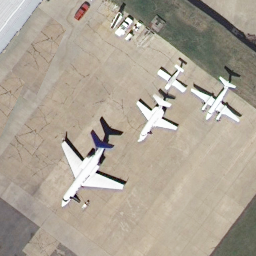

In [387]:
image = Image.open("./lab2-图像压缩/Images/airplane/airplane00.tif")
image

In [388]:
image_array = np.array(image)
(M, N, P) = image_array.shape

## PCA decomposition in sklearn

In [389]:
n = 50
decompressed_data = np.zeros((M, N, P), dtype=np.uint8)

scale = preprocessing.StandardScaler(with_std=False)

pca = PCA(n_components=n)

for i in range(P):
    # get the R,G,B matrix(256 * 256) respectively, then decompress the matrix
    tmp_data = image_array[:,:,i]
    
    # standardize data by substracting the mean of each feature
    tmp_data = scale.fit_transform(tmp_data) 
    
    # project the data into principal components
    pca_data = pca.fit_transform(scaled_data)
    
    # inverse transform the decompressed data to original scale
    reconstructed_pixels = pca.inverse_transform(pca_data)
    assert reconstructed_pixels.shape == (M, N)
    
    decompressed_data[:,:,i] = reconstructed_image
    

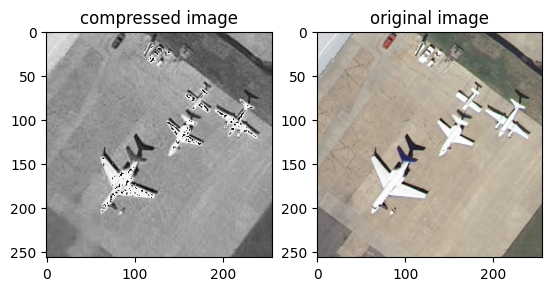

In [390]:
plt.subplot(1,2,1)
plt.imshow(decompressed_data)
plt.title("compressed image")

plt.subplot(1,2,2)
plt.title("original image")
plt.imshow(image_array)

##  achieving the image decomposition manually

In [442]:
import numpy as np

np.random.seed(100)

def power_method(matrix, num_iterations=100):
    n = matrix.shape[0]
    eigenvalues = []
    eigenvectors = []

    for _ in range(50):
        # Step 1: Initialize a non-zero vector as the initial estimate of the eigenvector
        v = np.random.rand(n)
        
        for _ in range(num_iterations):
            # Step 2: Iteration
            w = np.dot(matrix, v)
            v = w / np.linalg.norm(w)

        # Step 3: Compute eigenvalue estimate
        eigenvalue = np.dot(v, np.dot(matrix, v)) / np.dot(v, v)

        # Store eigenvalue and eigenvector
        eigenvalues.append(eigenvalue)
        eigenvectors.append(v)

        # Deflate the matrix
        matrix = matrix - eigenvalue * np.outer(v, v)

    return eigenvalues, eigenvectors

In [451]:
manual_compressed_data = np.zeros((M, N, P), dtype=np.uint8)


# iterator
for i in range(P):
    pixels_data = image_array[:,:,i]
    # standard the data
    mean_value = np.mean(pixels_data, axis=0)
    scaled_data = tmp_data - mean_value
    
    # compute eigenvalues and eigenvectors
    eigenValues, eigenVectors = power_method(pixels_data.T @ pixels_data)
    V = np.zeros((N, n)) # transformation matrix
    for _ in range(n):
        V[:, _] = eigenVectors[_]
    assert V.shape == (N, n) # each column is a principal component
    
    # project the data into the principal components
    compressed_data = scaled_data @ V
    
    # inverse 
    inversed_data = np.uint8(compressed_data @ V.T + mean_value) 
    assert inversed_data.shape == (M, N)
    
    # merge
    manual_compressed_data[:, :, i] = inversed_data

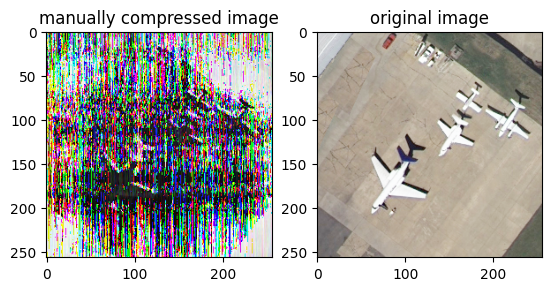

In [452]:
plt.subplot(1,2,1)
plt.title("manually compressed image")
plt.imshow(manual_compressed_data)

plt.subplot(1,2,2)
plt.title("original image")
plt.imshow(image_array)

plt.show()

In [395]:
# standardize the data
image_G = image_array[:,:,1]
mean_G = np.mean(image_G, axis=0)
scaled_data = image_G - mean_G
scaled_data

array([[ 55.1484375 ,  56.12109375,  53.21484375, ...,  31.71875   ,
         34.07421875,  31.94921875],
       [ 53.1484375 ,  56.12109375,  49.21484375, ...,  27.71875   ,
         32.07421875,  31.94921875],
       [ 57.1484375 ,  49.12109375,  52.21484375, ...,  26.71875   ,
         33.07421875,  32.94921875],
       ...,
       [-51.8515625 , -49.87890625, -47.78515625, ..., -42.28125   ,
        -37.92578125, -38.05078125],
       [-49.8515625 , -49.87890625, -56.78515625, ..., -44.28125   ,
        -39.92578125, -40.05078125],
       [-51.8515625 , -51.87890625, -53.78515625, ..., -42.28125   ,
        -40.92578125, -40.05078125]])

In [396]:
# compute eigenvector and eigenvalue of covariance matrix
eigenValues, eigenVectors = power_method(matrix=scaled_data.T@scaled_data)
print(f"eigenvalue = {eigenValue}")

V = np.zeros((N, n))
for i in range(n):
    V[:, i] = eigenVectors[i]

assert V.shape == (N, n)
    
# for test
print()
num_eigenValues, num_eigenVector = np.linalg.eig(scaled_data@scaled_data)
print(np.sort(num_eigenValue)[::-1][:20])

eigenvalue = [9579695.410337614, 1327928.8636663759, -1205692.635432497, -532303.9833129633, 178216.9281503708, -73593.25781897522, 456641.3163453194, -497556.8567841237, -266170.75928403233, 401050.30193583656, -24102.83524687636, 6168.272456940913, -1660.575141441285, 802.9423319318084, -734.4394106338187, 520.4700735767983, -331.6375816609434, -844.5767692360789, 1641.48964114218, -1023.2040921026928]

[9579695.41033762     +0.j         1207219.49608071     +0.j
  892593.28955377+492481.64099717j  892593.28955377-492481.64099717j
  784579.64043035     +0.j          438083.76415562     +0.j
  316278.10433093     +0.j          299798.48011299+180087.81175005j
  299798.48011299-180087.81175005j  250012.61917961+318531.71537337j
  250012.61917961-318531.71537337j  145725.44620206     +0.j
  117941.63401051     +0.j          116276.10841495+139657.15675605j
  116276.10841495-139657.15675605j  110830.7822642  +68377.00588322j
  110830.7822642  -68377.00588322j   81827.49067173 +24833.9167

In [397]:
# project the data into the eigenvector
compressed_data = scaled_data @ V

assert compressed_data.shape == (256, 50)

In [398]:
# inverse transform

inversed_data = np.uint8(compressed_data @ V.T + mean_G)

In [399]:
inversed_data

array([[218, 216, 215, ..., 173, 170, 170],
       [218, 215, 214, ..., 170, 169, 170],
       [210, 208, 209, ..., 164, 164, 163],
       ...,
       [104, 108, 109, ...,  97,  99, 104],
       [ 99, 104, 106, ...,  96,  97, 102],
       [ 98, 103, 104, ...,  96,  95,  99]], dtype=uint8)

In [172]:
np.mean(image_array, axis=0).shape

(256, 3)

In [175]:
test = np.array([[[1,2], [2,3]], [[2,3], [0,0]], [[100,203], [203,32]]])
print(test)
np.sum(test, axis=0)

[[[  1   2]
  [  2   3]]

 [[  2   3]
  [  0   0]]

 [[100 203]
  [203  32]]]


array([[103, 208],
       [205,  35]])

## Reference

- [bilibili(explain why we standard data)](https://www.bilibili.com/video/BV1X54y1R7g7/?spm_id_from=333.337.search-card.all.click&vd_source=4d8586f3dded416b864b75d3304fb8ef)
- [statQuest]()